The business case for using this data set is to gain insights into the current state of the global software engineering/development realm. This data source was populated from a survey of nearly 90,000 developers asking them about their development habits, technologies used, pay, workflow, interests & much more. 

My organisation would like to gain an insight into developer workflows and technologies, so they can invest resources into better supporting developers and enabling them to develop relevant market skills. My organisation is a global organisation however this research shall be tailored for the United Kingdom, as this is the region that my organisation would like to gain insight into first. However, it is important that I retrieve data across a variety of regions, and compare trends between regions so that the data can be contextualised against other regions.

In [40]:
# initial setup importing libraries and data source
import pandas as pd # working with data set
import matplotlib.pyplot as plt # graphs

# reading data and storing it in a DataFrame object
df = pd.read_csv('survey_results_public.csv')
# Retrieving first 5 rows in dataframe
df.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

Here are the first five rows from the Stack Overflow 2023 Developer Survey CSV data source file. There are numerous data fields in this data set but we will primarily be focusing on the field's that are associated with developer workflows and technologies. 

In [41]:
df = df.drop_duplicates()

df = df.drop([
    'ResponseId',  # Unique identifier, not relevant for analysis
    'Q120',        # Internal metadata, likely not relevant
    'SOAccount',   # Whether they have a Stack Overflow account or not is not directly relevant
    'SOComm',      # Community belonging is less relevant to technology and workflow
    'TBranch',    # Participation in Professional Developer Series
    'ICorPM',     # Individual Contributor or People Manager status
    'TimeSearching', 'TimeAnswering', # Time spent searching/answering questions
    'SurveyLength', 'SurveyEase', # Feedback on survey length and ease
    'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith' # office tools
], axis=1)

print(df.columns.values.tolist())

['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOPartFreq', 'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen', 'AIToolInterested in Using', 'AIToolCurrently Using', 'AIToolNot interested in Usin

Here I am doing some data cleansing, by removing columns that are not so relevant to the business case and duplicates. This will improve query performance, as well as curate our data set for the business case defined at the top of this notebook.  

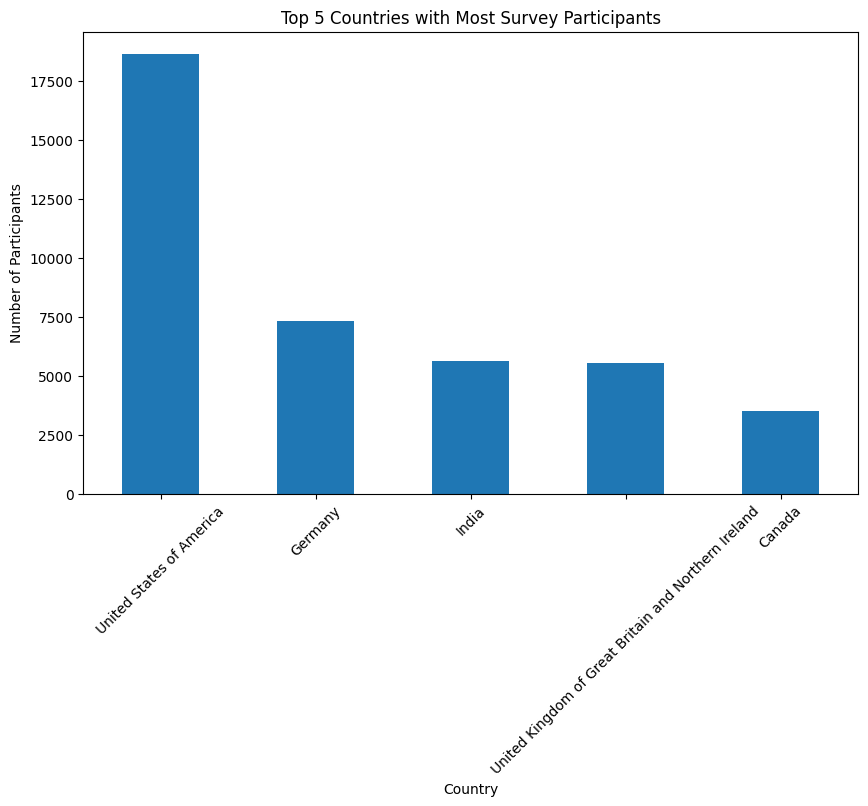

In [42]:
# Aggregate the data
country_counts = df['Country'].value_counts()

# Sort and select the top 5
top_5_countries = country_counts.head(5)

# Bar Chart Visualisation
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar')
plt.title('Top 5 Countries with Most Survey Participants')
plt.xlabel('Country')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.show()

Here are the top 5 countries with the most survey participants...

In [43]:
# Identify the top 5 countries
top_5_countries = df['Country'].value_counts().head(5).index

# Filter the dataset to include only the top 5 countries
filtered_data = df[df['Country'].isin(top_5_countries)]

... so we will clean the data and ignore data from other countries for simplicity and concentration purposes.

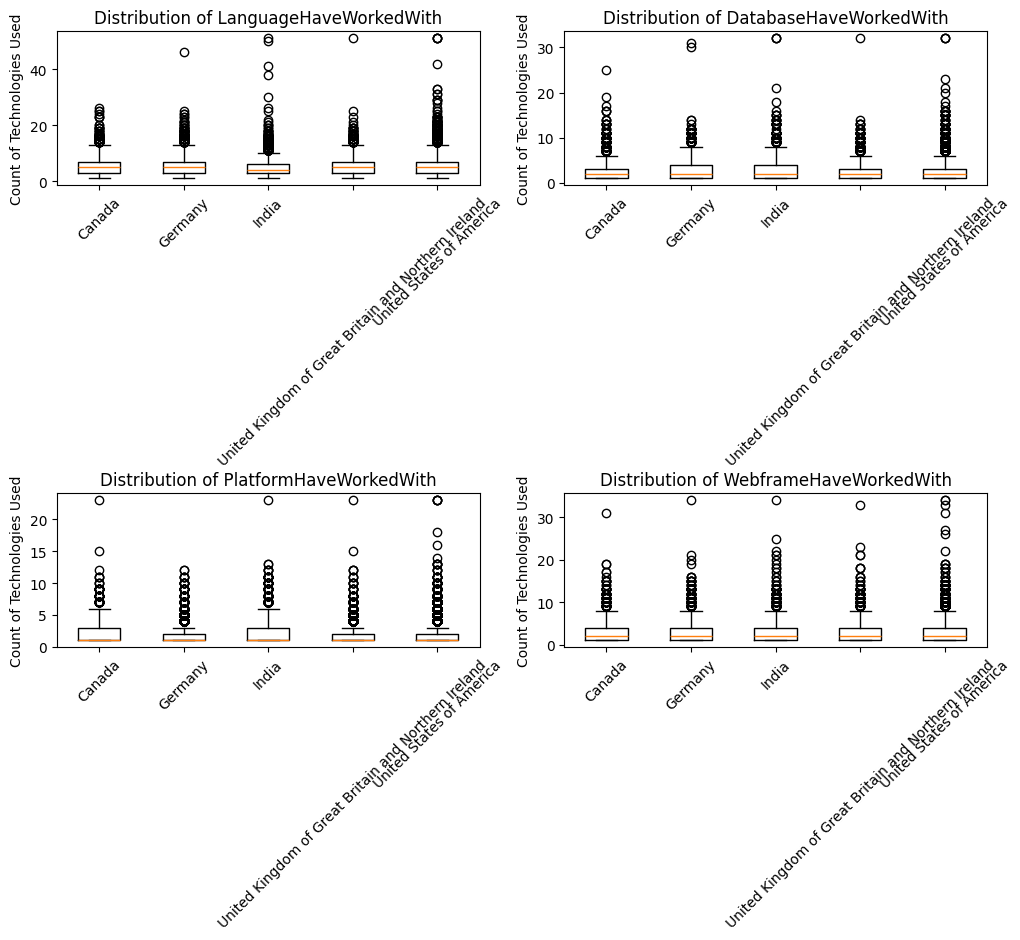

In [44]:
# Process the data to count the number of technologies used per respondent
def count_tech_per_respondent(row):
    return len(str(row).split(';'))

# Columns to analyze
tech_columns = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith']

# Creating a DataFrame to hold the counts
tech_counts = pd.DataFrame()

for col in tech_columns:
    col_count = filtered_data[col].apply(count_tech_per_respondent)
    tech_counts[col] = col_count

# Adding country for grouping
tech_counts['Country'] = filtered_data['Country']

# Plotting
plt.figure(figsize=(12, 8))

# Box plot for each technology category
for i, col in enumerate(tech_columns, 1):
    plt.subplot(2, 2, i)
    boxplot_data = tech_counts.groupby('Country')[col].apply(list)
    plt.boxplot(boxplot_data, labels=boxplot_data.index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count of Technologies Used')

plt.subplots_adjust(hspace=2)
plt.show()


The above graph shows boxplots that demonstrate the distribution of languages, databases, platforms and web frameworks for each region. 

On the languages distributon graph, there are a significant number of outliers, illustrating that software developers can use over 20 languages, although the median is generally below 10. There is a wide range of outliers in the UK, which suggests that there are developers who work with a very high number of languages. This could point to a diverse and possibly fragmented development landscape. The interquartile range (IQR) is fairly tight in the UK, indicating less variation in the central tendency among the middle 50% of respondents compared to countries like India.

On the database distribution graph, the IQR is comparable across all countries, indicating similar variability in database technology usage within each region. The UK's median is close to that of other countries, suggesting a similar level of database usage.

For the platform graph, the UK has the lowest IQR, implying a more specialised, or focused usage of platforms by developers.

Regarding web framework distribution, the UK shows a median similar to other countries, indicating a common ground in web framework usage. This is insightful, as it can validate the hypothesis that investing into developer's education for a variety web frameworks would be beneficial as this knowledge bank could be shared and actively applied across other regions.

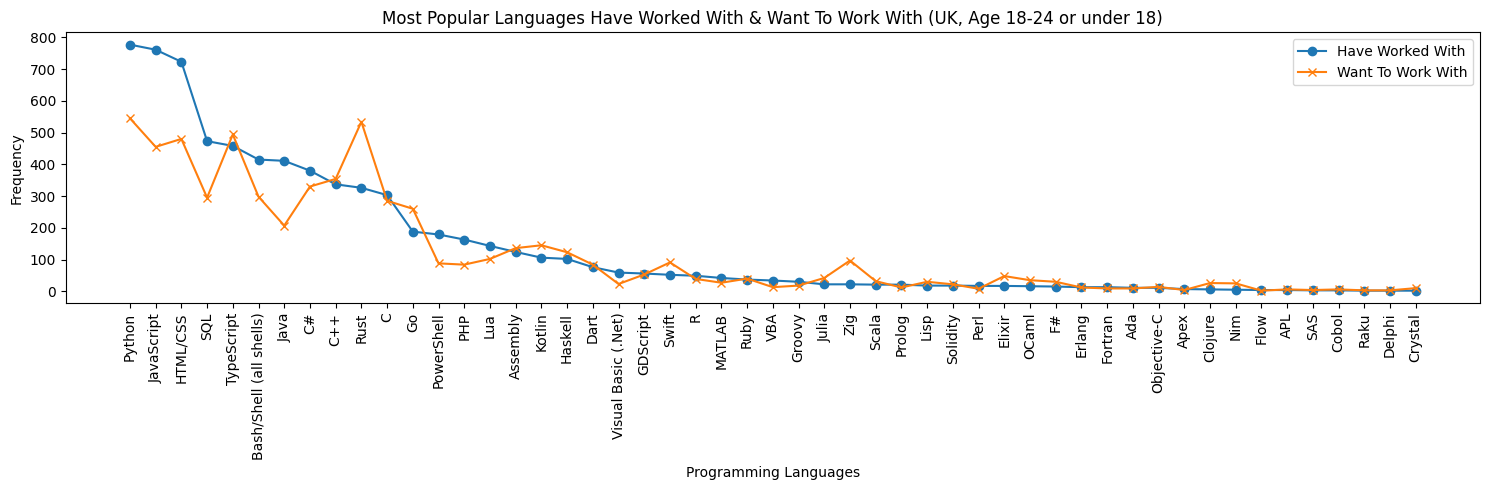

In [45]:
# Filter the DataFrame for the United Kingdom and the specified age range
uk_young_devs = df[(df['Country'] == 'United Kingdom of Great Britain and Northern Ireland') & 
(df['Age'].isin(['18-24 years old', 'Under 18 years old']))]

# Function to count the frequency of each language
def count_languages(series):
    # Split the string by semicolon and return the exploded list to count each language separately
    return series.str.cat(sep=';').split(';')

# Count the languages for 'LanguageHaveWorkedWith' and 'LanguageWantToWorkWith'
languages_have_worked = count_languages(uk_young_devs['LanguageHaveWorkedWith'])
languages_want_to_work = count_languages(uk_young_devs['LanguageWantToWorkWith'])

# Count the frequency of each language
languages_have_worked_freq = pd.Series(languages_have_worked).value_counts()
languages_want_to_work_freq = pd.Series(languages_want_to_work).value_counts()

# Combine the frequencies into a single DataFrame
combined_freq = pd.DataFrame({
    'HaveWorkedWith': languages_have_worked_freq,
    'WantToWorkWith': languages_want_to_work_freq
})

# Sort by 'HaveWorkedWith' frequency for the line graph
combined_freq = combined_freq.sort_values(by='HaveWorkedWith', ascending=False)

# Plot the line graph
plt.figure(figsize=(15, 5))
plt.plot(combined_freq['HaveWorkedWith'], marker='o', label='Have Worked With')
plt.plot(combined_freq['WantToWorkWith'], marker='x', label='Want To Work With')
plt.title('Most Popular Languages Have Worked With & Want To Work With (UK, Age 18-24 or under 18)')
plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

This graph shows the languages that younger developers (under 18 and 18-24) in the UK have worked with and want to work with. This information is useful to my organisation as they have a large emphasis on training young people, so they want to focus a portion of their resources on improving young people's programming skills, in languages that are likely to be widely used in the future (as inferred from the languages that they want to work with).

This graph shows that Python, Javascript and HTML/CSS are the most popular languages people have worked with, so it would be wise for my company to invest in resources to develop these current skills. However, languages such as Typescript, C++, C, Go, Kotlin, Dart & Swift all have a greater than or equal number of people wanitng to work with them, compared to having worked with them, so my organisation would be smart to invest in developing its young employees' skills in these languages as well, in preparation for potential future demand. One particular language, Rust, has an outlier positive difference with people wanting to work with it, so this is one language that my organisation should definitely strategically allocate resources towards for learning and development.

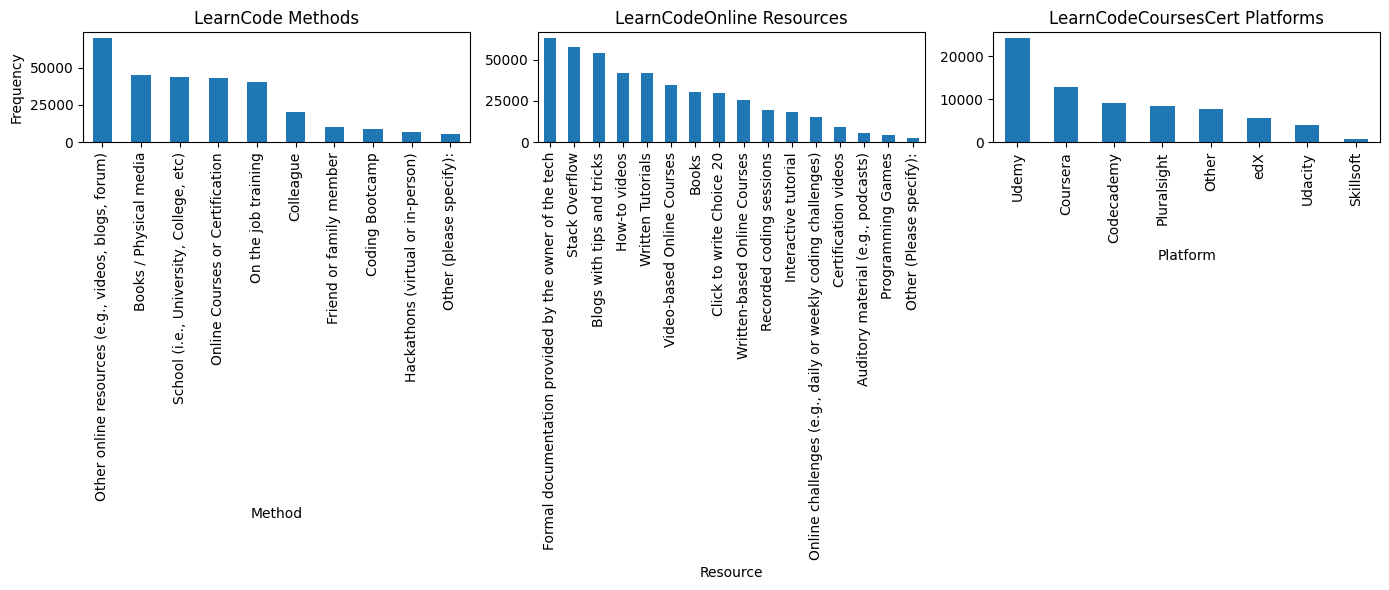

In [47]:
# Function to split the semi-colon separated list and count each unique category
def count_semi_colon_separated_values(df, column):
    return df[column].str.cat(sep=';').split(';')

# Create lists of all the learning methods from the semi-colon separated fields
learn_code_all = count_semi_colon_separated_values(df, 'LearnCode')
learn_code_online_all = count_semi_colon_separated_values(df, 'LearnCodeOnline')
learn_code_courses_cert_all = count_semi_colon_separated_values(df, 'LearnCodeCoursesCert')

# Count the occurrences of each learning method
learn_code_freq = pd.Series(learn_code_all).value_counts()
learn_code_online_freq = pd.Series(learn_code_online_all).value_counts()
learn_code_courses_cert_freq = pd.Series(learn_code_courses_cert_all).value_counts()

# Plotting histograms for learning methods
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
learn_code_freq.plot(kind='bar')
plt.title('LearnCode Methods')
plt.xlabel('Method')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
learn_code_online_freq.plot(kind='bar')
plt.title('LearnCodeOnline Resources')
plt.xlabel('Resource')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
learn_code_courses_cert_freq.plot(kind='bar')
plt.title('LearnCodeCoursesCert Platforms')
plt.xlabel('Platform')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


The first histogram demonstrates the frequency of different methods people use to learn to code. The most popular resources are online resources so it is logical for my organisation to invest the most in those resources. Of these online resources, the second histogram demonstrates that formal documentation, Stack Overflow, blogs and videos are the main resources people use online. However, we must be weary of the Stack Overflow data point as there is significant bias in these results considering that the data for survey was collected on the Stack Overflow website itself.

As my organisation is looking to invest in online resources that would best help its employees to code, I have identified from the third histogram that Udemy courses would most likely be the best platform to provide to my organisation's developers, as this is the most popular online course and certification platform by far.

On-the-job training and other practical methods like coding bootcamps, both virtual and in-person, indicate that hands-on experience is highly valued among learners. However, the popularity in course platfoms may reflect a trend towards continuous learning and professional development through certificate programs.